In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/raw/Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


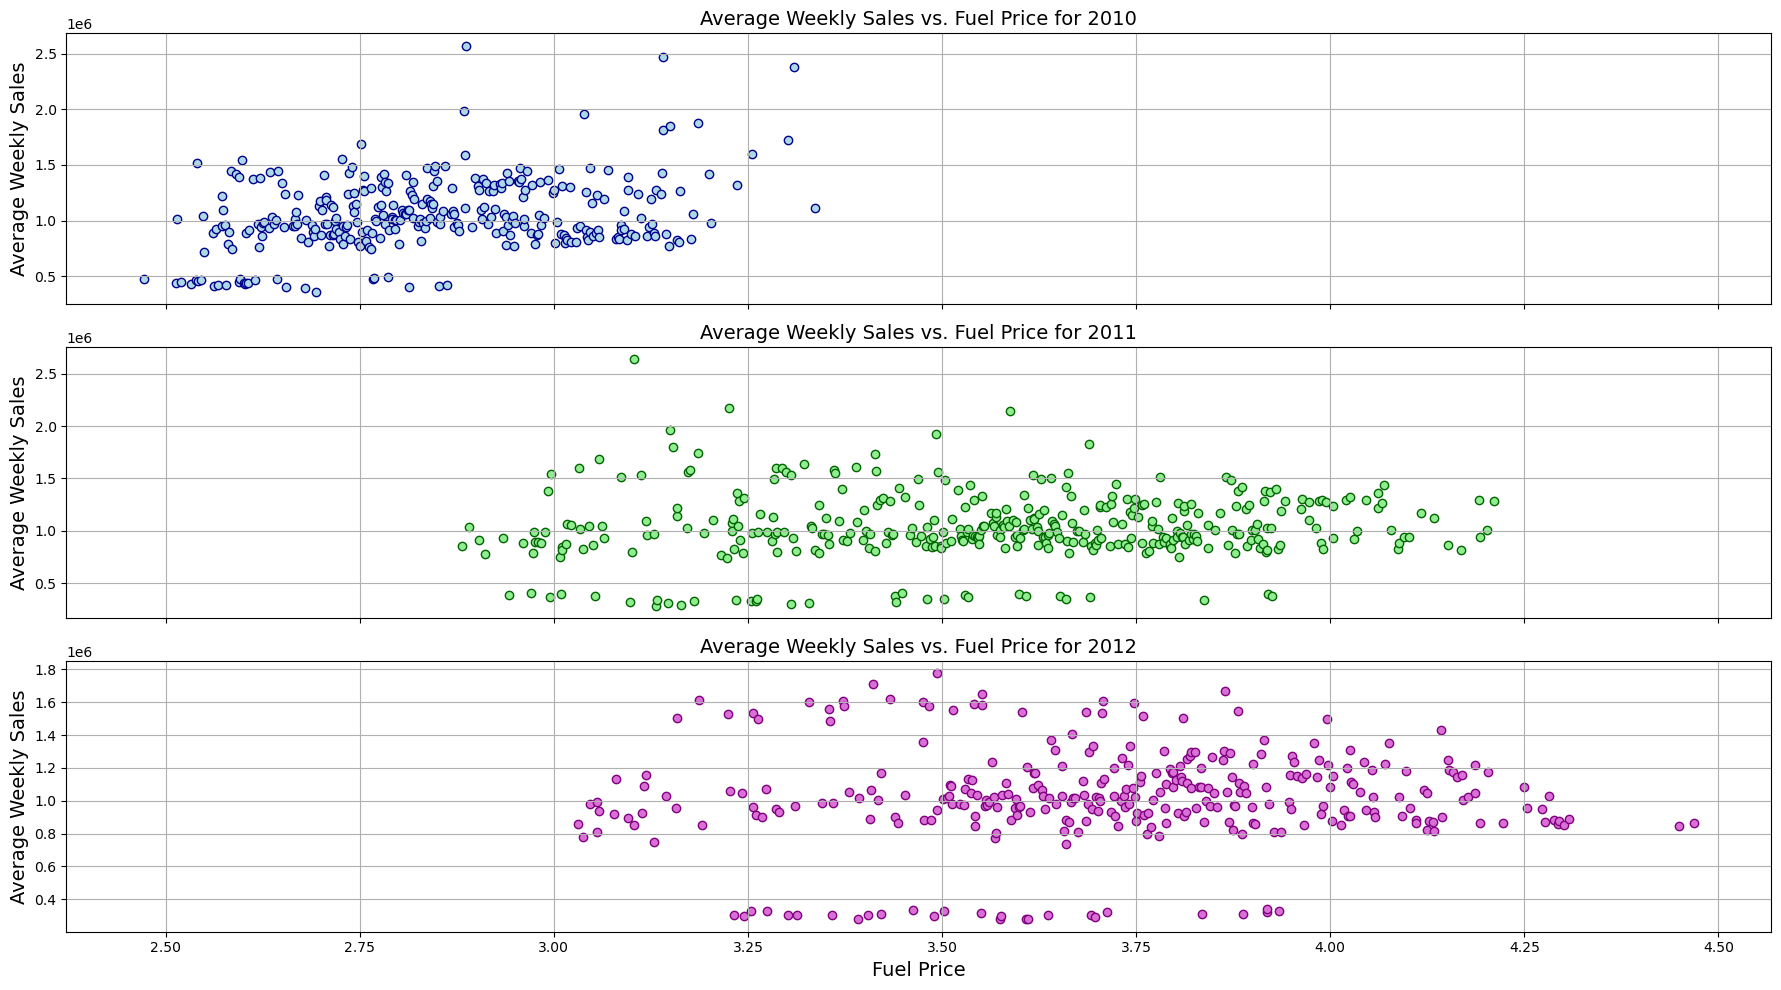

In [3]:
# Converting 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

data_2010 = data[data['Date'].dt.year == 2010]
avg_sales_by_fuel_2010 = data_2010.groupby('Fuel_Price')['Weekly_Sales'].mean().reset_index()

data_2011 = data[data['Date'].dt.year == 2011]
avg_sales_by_fuel_2011 = data_2011.groupby('Fuel_Price')['Weekly_Sales'].mean().reset_index()

data_2012 = data[data['Date'].dt.year == 2012]
avg_sales_by_fuel_2012 = data_2012.groupby('Fuel_Price')['Weekly_Sales'].mean().reset_index()

# Creating a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(18, 10), sharex=True)

# Scatter plot for 2010
axs[0].scatter(avg_sales_by_fuel_2010['Fuel_Price'], avg_sales_by_fuel_2010['Weekly_Sales'], color='lightblue', edgecolor='darkblue')
axs[0].set_title('Average Weekly Sales vs. Fuel Price for 2010', fontsize=14)
axs[0].set_ylabel('Average Weekly Sales', fontsize=14)
axs[0].grid(True)

# Scatter plot for 2011
axs[1].scatter(avg_sales_by_fuel_2011['Fuel_Price'], avg_sales_by_fuel_2011['Weekly_Sales'], color='lightgreen', edgecolor='darkgreen')
axs[1].set_title('Average Weekly Sales vs. Fuel Price for 2011', fontsize=14)
axs[1].set_ylabel('Average Weekly Sales', fontsize=14)
axs[1].grid(True)

# Scatter plot for 2012
axs[2].scatter(avg_sales_by_fuel_2012['Fuel_Price'], avg_sales_by_fuel_2012['Weekly_Sales'], color='orchid', edgecolor='purple')
axs[2].set_title('Average Weekly Sales vs. Fuel Price for 2012', fontsize=14)
axs[2].set_xlabel('Fuel Price', fontsize=14)
axs[2].set_ylabel('Average Weekly Sales', fontsize=14)
axs[2].grid(True)

plt.tight_layout()
plt.show()

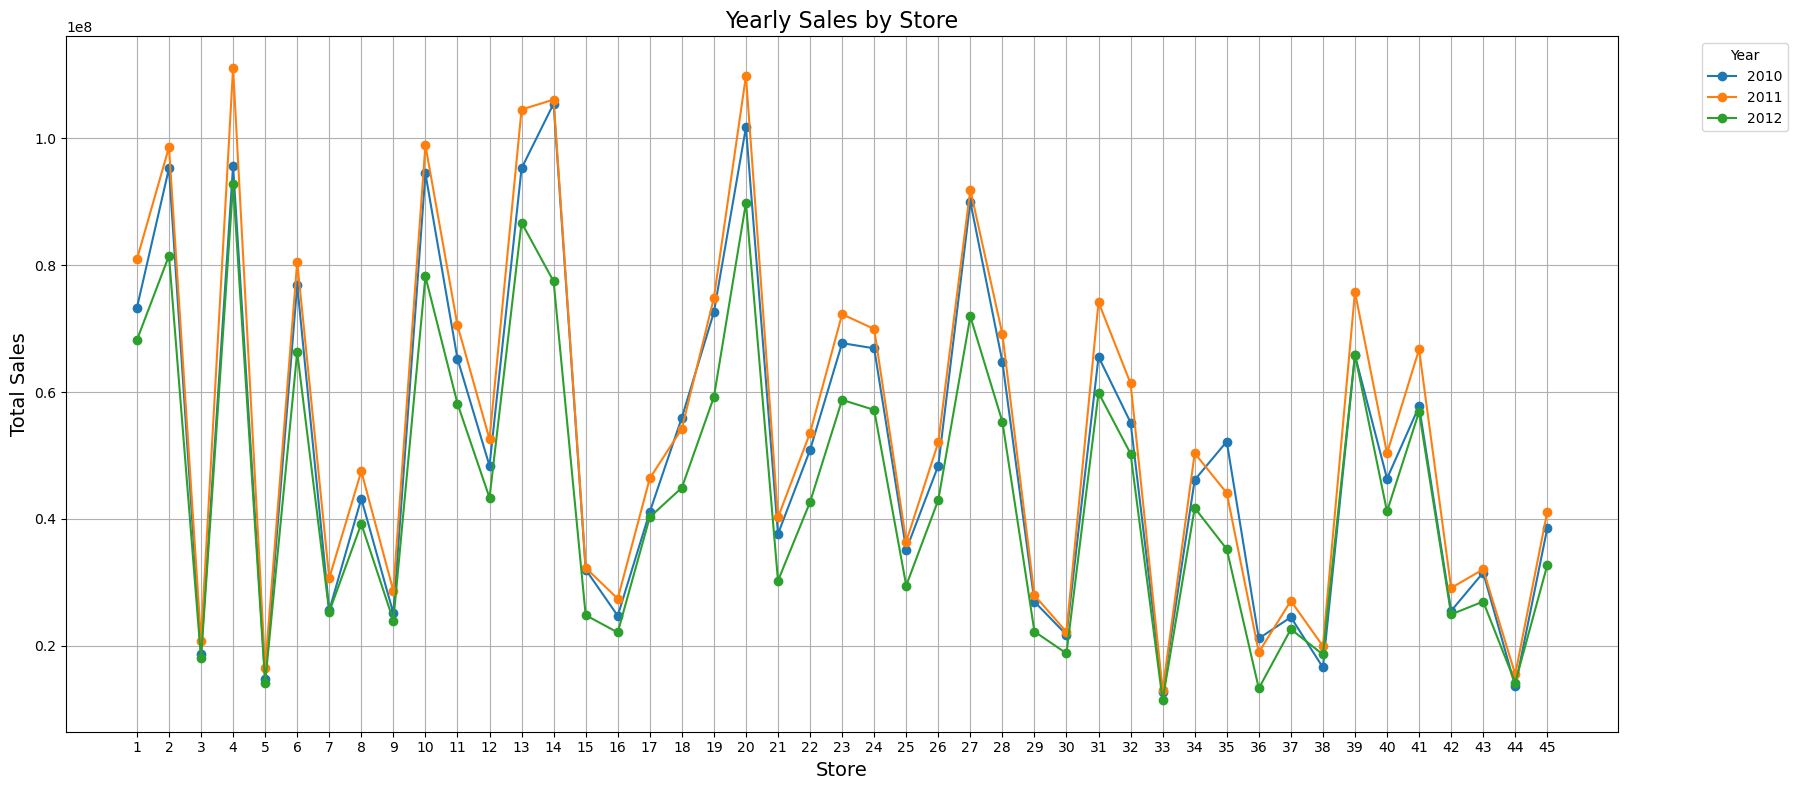

In [4]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

# Filtering data for the years 2010, 2011, and 2012
data_filtered = data[data['Year'].isin([2010, 2011, 2012])]

# Total yearly sales by store
yearly_sales_by_store = data_filtered.groupby(['Year', 'Store'])['Weekly_Sales'].sum().reset_index()

# Pivot the data for plotting
pivot_table = yearly_sales_by_store.pivot(index='Year', columns='Store', values='Weekly_Sales')

# Plotting
plt.figure(figsize=(18, 8))
pivot_table.T.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())  # Transpose to get years on x-axis

plt.xticks(np.arange(1, 46, step=1))
plt.title('Yearly Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True)

plt.tight_layout()
plt.show()

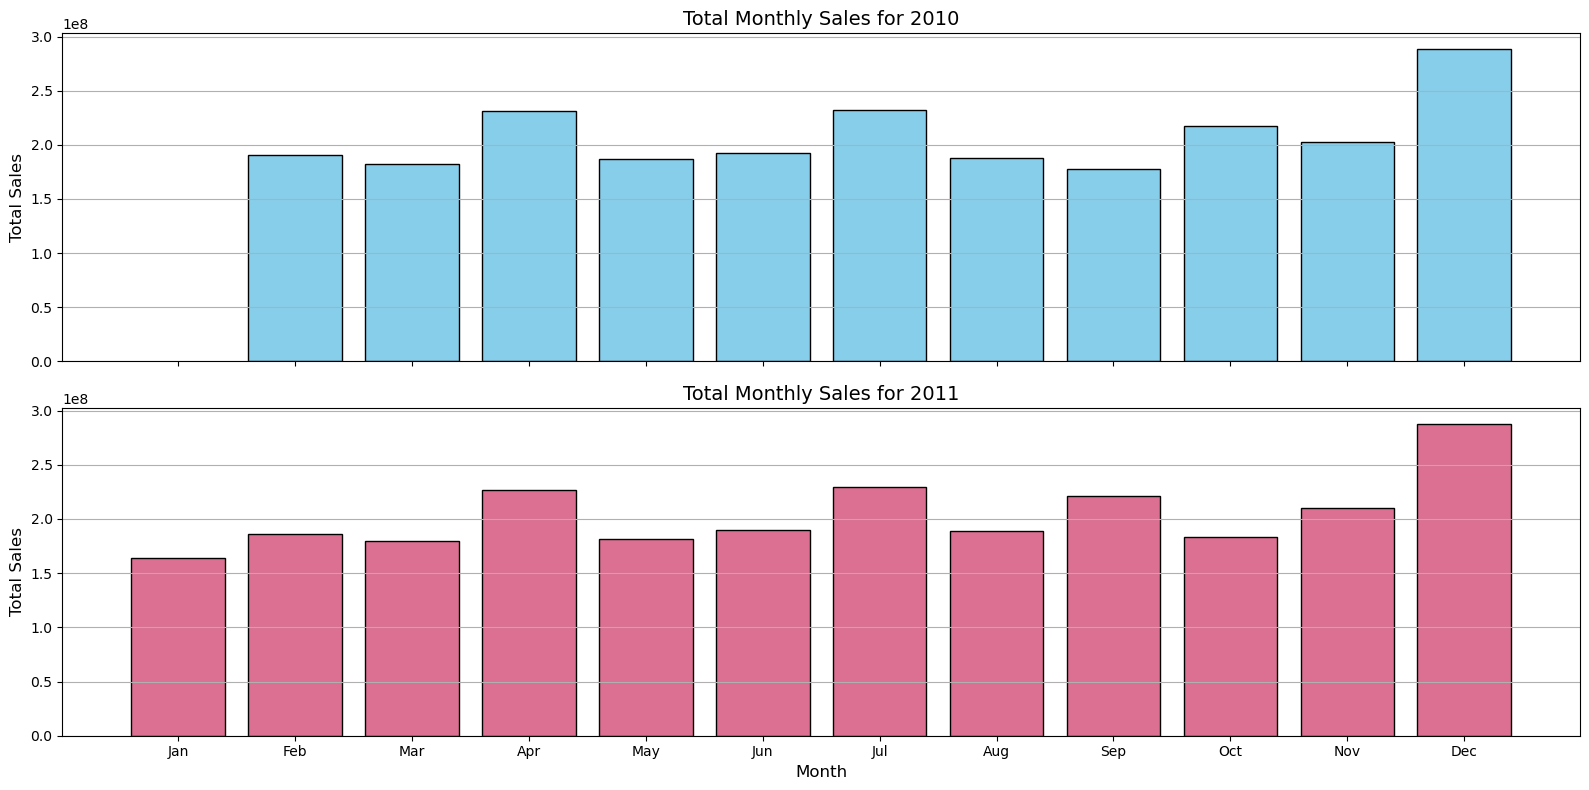

In [16]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filtering data for each year and computing total monthly sales
years = [2010, 2011]
monthly_sales_by_year = {}

for year in years:
    # Filter data for the specific year
    data_year = data[data['Date'].dt.year == year]
    # Extract month from 'Date'
    data_year['Month'] = data_year['Date'].dt.month
    # Compute total monthly sales
    monthly_sales_total = data_year.groupby('Month')['Weekly_Sales'].sum().reset_index()
    monthly_sales_by_year[year] = monthly_sales_total

# Plotting
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 8), sharex=True)

# Colors and titles for each subplot
colors = ['skyblue', 'palevioletred']
titles = ['Total Monthly Sales for 2010', 'Total Monthly Sales for 2011']

for i, year in enumerate(years):
    ax = axs[i]
    monthly_sales_total = monthly_sales_by_year[year]
    ax.bar(monthly_sales_total['Month'], monthly_sales_total['Weekly_Sales'], color=colors[i], edgecolor='black')
    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Total Sales', fontsize=12)
    ax.grid(axis='y')

axs[1].set_xlabel('Month', fontsize=12)
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()